In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
from xs_scan_proc import calculate_Iqphi,chunk_idx,parallel_func,pttn_roi_sum
from h5_data_search import id13_h5_search
import pyFAI
import numpy as np
import h5py
import os
import fabio
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
%run -i test.py

In [4]:
def samples_for_process(obj,kw_list):
    # obj is the "id13_h5_search" object include dataset structure information, defined in the "h5_data_search"
    # kw_list is key word list, should have form like: [kw] for one sample, 
    # or [[kw1],[kw2]...] for multiple samples
    sample_num = 1
    samples    = {}
    for kw in kw_list:
        if isinstance(kw,list):
            obj.keyword_search(*kw)
        elif isinstance(kw,str):
            obj.keyword_search(kw)
        
        for _ in range(len(obj._data_name)):
            samples['sample{}'.format(sample_num)] = [obj._data_name[_]]
        
        sample_num += 1
        
    return samples

In [5]:
proposal_path = "/data/visitor/ls2995/id13"
proposal_num  = "ls2995"
data_path     = 'entry_0000/measurement/data'
# the directory could be replaced by user with specific path
save_path     = os.getcwd()


t1 = id13_h5_search(proposal_path,proposal_num)


sample_keywords = [
                  #['MoBS_A_C1_9.1'],
                  #['WTCS1','8'],
                  #['WTCS1_b_mac1_strip1lr1_1.1'],
                  #['WTCS1_b_mac1_strip1lr1_2.1'],
                  ['WTCS1_c_mac1_strip1lr1_1.1'],
                  #['mac1','sup']
                  ]
samples = samples_for_process(t1,sample_keywords)

found dataset:
WTCS1_c_mac1_strip1lr1_1.1

sample:
WTCS1

dataset:
WTCS1_c_mac1_strip1lr1

scan:
scan00001

more than one hdf data found

data information:
{'scan_type': 'akmap_lut', 'fast_axis': 'ustry', 'fast_axis_start_pos': -7.480499999999999, 'fast_axis_end_pos': -6.480499999999999, 'fast_axis_num_step': 201, 'slow_axis': 'ustrz', 'slow_axis_start_pos': -4.3134, 'slow_axis_end_pos': -3.3133999999999997, 'slow_axis_num_step': 201, 'exposure_time': 0.02}

detector position:
-614.0

21 h5 files in this scan





In [6]:
total_pttns,scan_shape,idx_list = scan_info(t1)
h5_list,path_idx,pttn_idx = scan_h5_data_info(t1,scan_shape,idx_list)

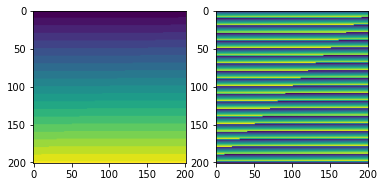

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
plt.imshow(path_idx)
plt.subplot(122)
plt.imshow(pttn_idx)

In [16]:
pttn_roi_sum(pttn_idx.flatten()[100],h5_list[path_idx.flatten()[100]],data_path=data_path)

3670.5967168244947

In [17]:
h5_list[path_idx.flatten()[100]]

'/data/visitor/ls2995/id13/WTCS1/WTCS1_c_mac1_strip1lr1/scan00001/eiger/WTCS1_c_mac1_strip1lr1_00001_data_000000.h5'

In [18]:
%run -i test.py

<Figure size 432x288 with 0 Axes>

In [19]:
proc_param_info(100,h5_list,path_idx.flatten(),pttn_idx.flatten())

('/data/visitor/ls2995/id13/WTCS1/WTCS1_c_mac1_strip1lr1/scan00001/eiger/WTCS1_c_mac1_strip1lr1_00001_data_000000.h5',
 100)

In [20]:
run_func(100,
         pttn_roi_sum, 
         h5_list=h5_list,
         path_idx=path_idx.flatten(),
         pttn_idx=pttn_idx.flatten(),
         data_path = data_path)

3670.5967168244947

In [22]:
import time
tm = time.time()
roi = parallel_func(scan_pttn_roi_sum,12,np.arange(len(path_idx.flatten())),
                   h5_list=h5_list,
                   path_idx=path_idx.flatten(),
                   pttn_idx=pttn_idx.flatten(),
                   data_path=data_path)
print(time.time()-tm)

414.3783504962921


AttributeError: 'list' object has no attribute 'reshape'

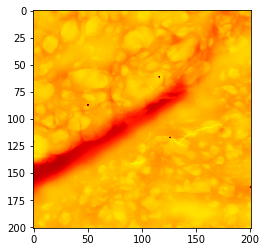

In [72]:
plt.subplots()
plt.imshow(np.array(roi).reshape(201,201),vmin=3650,vmax=3680,cmap='jet')


from xs_scan_proc import *

def parallel_new_func(func,num_cores,args,*args2,**kwargs):
    func = partial(func,*args2,**kwargs)
    with Pool(num_cores) as pool:
        res = pool.map(func,args) 
        pool.close()
    return res

roi = parallel_new_func(run_func,12,np.arange(len(path_idx.flatten())),
                   pttn_roi_sum,
                   h5_list=h5_list,
                   path_idx=path_idx.flatten(),
                   pttn_idx=pttn_idx.flatten(),
                   data_path=data_path)

In [73]:
414/201/201

0.010247271107150815

In [74]:
201*201*0.02/3600

0.22444999999999998

In [75]:
414/3600

0.115